# NYC Airbnb Unsupervised Machine Learning

## This script contains the following
### 1. Importing Libraries and Data
### 2. The Elbow Technique 
### 3. k-Means Clustering

## Importing Libraries and Data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
#set path
path = r'/Users/shelbysteele/Documents/Airbnb NYC Rental Analysis'

In [4]:
#import data
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'NYC_cleaned_data_3.csv'))

In [5]:
#enable graphs apprear without calling them
%matplotlib inline

In [6]:
#checking df
df.shape

(81563, 21)

In [7]:
#checking columns
df.columns

Index(['listing', 'host_identity_verified', 'borough', 'neighborhood',
       'latitude', 'longitude', 'instant_bookable', 'cancellation_policy',
       'room_type', 'construction_year', 'price', 'service_fee',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number', 'listings_per_host',
       'days_booked', 'fee_category', 'revenue'],
      dtype='object')

In [9]:
#Checking dataframe
df.head()

,listing,host_identity_verified,borough,neighborhood,latitude,longitude,instant_bookable,cancellation_policy,room_type,construction_year,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,listings_per_host,days_booked,fee_category,revenue
0,0,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020,...,193,10,9,10/19/21,0.21,4,6,286,High Fee,276276
1,1,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007,...,28,30,45,5/21/22,0.38,4,2,228,Low Fee,32376
2,2,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009,...,41,10,9,11/19/18,0.10,3,1,289,Low Fee,58956
3,3,verified,Manhattan,Murray Hill,40.74767,-73.97500,True,flexible,Entire home/apt,2013,...,115,3,74,6/22/19,0.59,3,1,365,Medium Fee,210605
4,4,unconfirmed,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,False,moderate,Private room,2009,...,212,45,49,10/5/17,0.40,5,1,219,High Fee,232140


In [10]:
#checking data types
df.dtypes

listing                     int64
host_identity_verified     object
borough                    object
neighborhood               object
latitude                  float64
longitude                 float64
instant_bookable             bool
cancellation_policy        object
room_type                  object
construction_year           int64
price                       int64
service_fee                 int64
minimum_nights              int64
number_of_reviews           int64
last_review                object
reviews_per_month         float64
review_rate_number          int64
listings_per_host           int64
days_booked                 int64
fee_category               object
revenue                     int64
dtype: object

In [12]:
df_sub= df[['listing', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 
             'reviews_per_month', 'review_rate_number', 'listings_per_host', 'days_booked', 'revenue']]

In [13]:
#chekcing subgroup
df_sub

,listing,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,listings_per_host,days_booked,revenue
0,0,2020,966,193,10,9,0.21,4,6,286,276276
1,1,2007,142,28,30,45,0.38,4,2,228,32376
2,2,2009,204,41,10,9,0.10,3,1,289,58956
3,3,2013,577,115,3,74,0.59,3,1,365,210605
4,4,2009,1060,212,45,49,0.40,5,1,219,232140
...,...,...,...,...,...,...,...,...,...,...,...
81558,81558,2020,1078,216,1,58,2.08,5,2,120,129360
81559,81559,2007,103,21,7,40,1.51,1,5,148,15244
81560,81560,2022,982,196,1,239,8.58,2,2,361,354502
81561,81561,2020,946,189,1,76,2.84,1,1,324,306504


## 2. The Elbow Technique

In [14]:
#defining the range of potential clusters and defining the k-means in the range. 
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [15]:
#creating a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] 

In [16]:
#checking output
score

[-942367111649876.8,
 -265784401395606.56,
 -141594248728473.75,
 -98832757520382.62,
 -78978242190747.73,
 -61509710115222.56,
 -51668795555086.37,
 -45718393603527.01,
 -40504285100060.5]

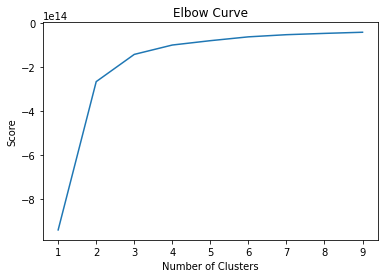

In [17]:
#Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is three.

## 3. k-Means Clustering

In [18]:
#create the k-means object
kmeans = KMeans(n_clusters = 3)

In [19]:
#fit the kmeans object to the datafram
kmeans.fit(df_sub)

KMeans(n_clusters=3)

In [20]:
#creating a new column for the clusters in the dataframe
df_sub['clusters'] = kmeans.fit_predict(df_sub)

/var/folders/4n/57r3q8s10pz5g_h9r3d2bgpw0000gp/T/ipykernel_26752/759225360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [21]:
#checking output
df_sub.head()

,listing,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,listings_per_host,days_booked,revenue,clusters
0,0,2020,966,193,10,9,0.21,4,6,286,276276,1
1,1,2007,142,28,30,45,0.38,4,2,228,32376,0
2,2,2009,204,41,10,9,0.10,3,1,289,58956,0
3,3,2013,577,115,3,74,0.59,3,1,365,210605,2
4,4,2009,1060,212,45,49,0.40,5,1,219,232140,1


In [22]:
#checking how many values are assigned to each cluster
df_sub['clusters'].value_counts()

0    50706
2    20060
1    10797
Name: clusters, dtype: int64

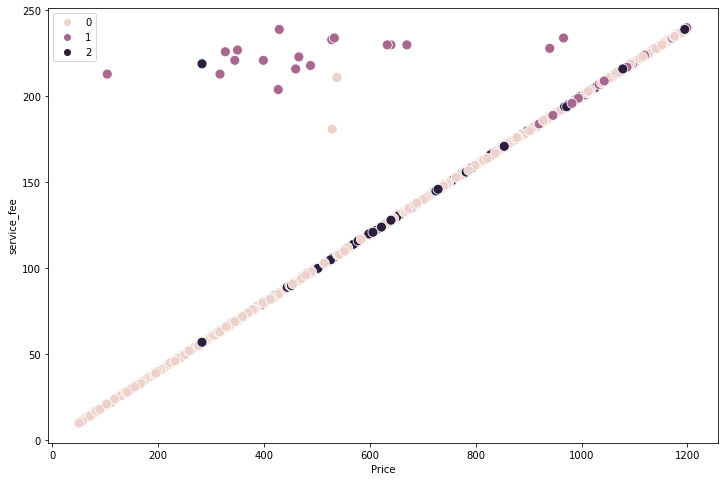

In [27]:
#plot clusters for the "price per unit' and 'distance to metro'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['price'], y=df['service_fee'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Price')
plt.ylabel('service_fee')
plt.show()

Most of cluster 0 is between o and 100, cluster 2 is between 100 and 150, and cluster 1 is betwwn 175 and 200. This represents that as the price of the Airbnb going up, so does the service fee. 

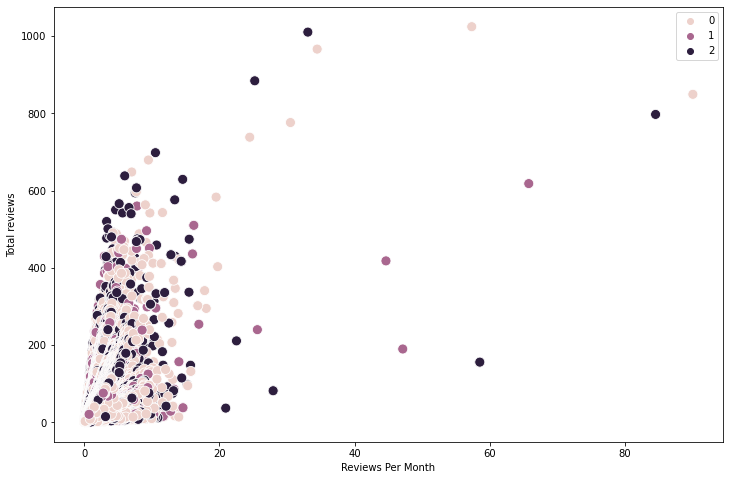

In [28]:
#plot clusters for the "price per unit' and 'distance to metro'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['reviews_per_month'], y=df['number_of_reviews'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Reviews Per Month')
plt.ylabel('Total reviews')
plt.show()

There isnt really a pattern to this scatterplot meaning that this isnt a good set of variables to use for this type of model

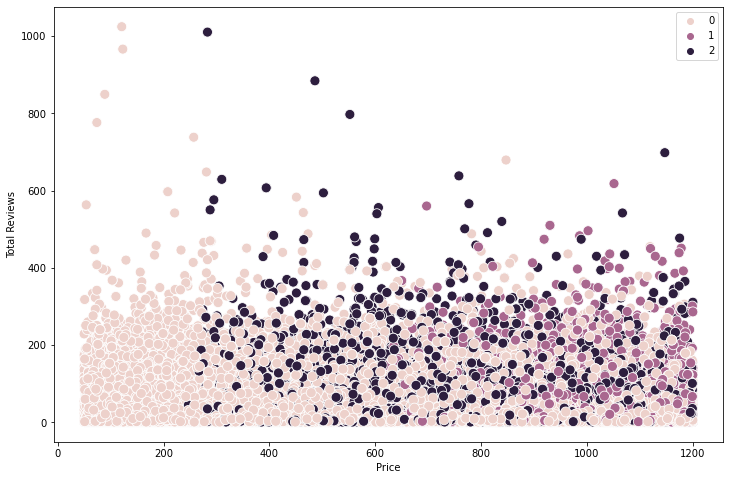

In [29]:
#plot clusters for the "price per unit' and 'distance to metro'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['price'], y=df['number_of_reviews'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Price')
plt.ylabel('Total Reviews')
plt.show()

There isnt really a pattern to this scatterplot meaning that this isnt a good set of variables to use for this type of model

In [30]:
#creating cluster colors
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/4n/57r3q8s10pz5g_h9r3d2bgpw0000gp/T/ipykernel_26752/680268923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [31]:
#looking at the descriptive statistice for each assgined colored cluster
df_sub.groupby('cluster').agg({'price':['mean', 'median'], 
    'service_fee':['mean', 'median'], 
    'reviews_per_month':['mean', 'median'],
    'number_of_reviews':['mean', 'median']})

price        service_fee        reviews_per_month         \
                   mean median        mean median              mean median   
cluster                                                                      
dark purple  688.472632  649.0  137.703240  130.0          1.573805   1.00   
pink         530.307242  480.0  106.065219   96.0          1.285259   0.64   
purple       958.269705  971.0  191.868389  194.0          1.434623   0.85   

            number_of_reviews         
                         mean median  
cluster                               
dark purple         39.316750   15.0  
pink                28.651994   10.0  
purple              36.446976   12.0

The service fee is exactly 1/5 of the price and its consistent with all pricing meaning that as the price increases at a certain Airnbn, so does the service fee. 

In [32]:
#exporting data
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'NYC_cleaned_data_3.csv'))